## BLG 454E - Learning From Data
-----------
### Homework 4
### Dimensionality Reduction and Clustering

-----------
#### Prepared by Res. Asst. Yaren Yılmaz
If you have any question, do not hesitate to concact me via **yilmazy20@itu.edu.tr**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Do not import any other libraries. You can add libraries only for visualizations.

from kmeans import KMeans

## K-Means Clustering
* Fill the functions from kmeans.py
* Use the below cells to validate your implementations for each function using simple inputs. **Do not change the cells.** These cells are given to make sure you wrote all the functions correctly before creating the K-Means model.

In [2]:
n_clusters = 3

In [3]:
# Validate the function "mean"
data = np.array([[1.1, 1, 1, 0.5], [4, 3.14, 2, 1], [0, 0, 0, 0]])
km = KMeans(data, n_clusters)
print(km.mean(data))

[1.7, 1.3800000000000001, 1.0, 0.5]


In [4]:
# Validate the function "std"
print(km.std())

[1.687206764645835, 1.309758247413112, 0.816496580927726, 0.408248290463863]


In [5]:
# Validate the function "standard_scaler"
print(km.standard_scaler())

[[-0.35561735 -0.29012988  0.          0.        ]
 [ 1.36319984  1.34375943  1.22474487  1.22474487]
 [-1.00758249 -1.05362956 -1.22474487 -1.22474487]]


In [6]:
# Validate the function "euclidean_distance"
print(km.euclidean_distance(data[0], data[1]))

3.7735394525564456


In [7]:
# Validate the function "get_closest_centroid"
km.centroids = [[1, 1, 1, 1],[2, 2, 2, 2]]
print(km.get_closest_centroid(data[0]))

0


In [8]:
# Validate the function "update_clusters"
km.X = [[1.1, 1, 1, 1.2], [4, 2, 2, 1.5], [0, 0, 0, 0]]
km.centroids = [[1, 1, 1, 1], [2, 2, 2, 2], [6, 6, 6, 6]]
print(km.update_clusters())

{0: [[1.1, 1, 1, 1.2], [0, 0, 0, 0]], 1: [[4, 2, 2, 1.5]], 2: []}


In [9]:
km.update_centroids(km.update_clusters())
print(km.centroids)

[[0.55, 0.5, 0.5, 0.6], [4.0, 2.0, 2.0, 1.5], [1.1, 1, 1, 1.2]]


In [10]:
c1 = {0: [[1.1, 1], [0, 0]],
                    1: [[4, 2]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

c1 = {0: [[1.1, 1], [0, 2]],
                    1: [[6, 7]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

True
False


## Dimensionality Reduction using PCA
* **TODO**: Fill the below function pca.
* Do not use libraries othere than numpy.
* Use n_components = 2.

In [11]:
def pca(X, n_components):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    :param X: Input data matrix of shape (n_samples, n_features)
    :param n_components: Number of principal components to keep
    :return: Transformed data matrix of shape (n_samples, n_components)
    """
    
    # Calculate the mean of each column
    means = np.mean(X, axis=0)

    # Center the data by subtracting column means
    centered_data = X - means

    # Calculate covariance matrix
    covariance_matrix = np.cov(centered_data.T)

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the first n eigenvectors
    selected_eigenvectors = eigenvectors[:, :n_components]

    # Transform the data using the selected eigenvectors
    transformed_data = centered_data @ selected_eigenvectors

    return transformed_data


### Fit K-Means Clustering
* When you are sure about your functions, fill the "fit" function from kmeans.py and run the K-Means Clustering.
* Run the model with different *k* values.
    * *k* = 3, 5, 7, 9
* Save the results (clusters, centroids)

* You have Iris dataset that contains measurements of sepal length, sepal width, petal length, petal width.


In [12]:
# Load the dataset
iris = load_iris()
X = iris.data

In [13]:
X = pca(X, 2)

In [14]:
km_3 = KMeans(X, 3)
clusters_3, centroids_3, wcss_3 = km_3.fit()

Converged in 6 steps


In [15]:
km_5 = KMeans(X, 5)
clusters_5, centroids_5, wcss_5 = km_5.fit()

Converged in 10 steps


In [16]:
km_7 = KMeans(X, 7)
clusters_7, centroids_7, wcss_7 = km_7.fit()

Converged in 8 steps


In [17]:
km_9 = KMeans(X, 9)
clusters_9, centroids_9, wcss_9 = km_9.fit()

Converged in 6 steps


In [18]:
km_11 = KMeans(X, 11)
clusters_11, centroids_11, wcss_11 = km_11.fit()

Converged in 8 steps


In [19]:
km_13 = KMeans(X, 13)
clusters_13, centroids_13, wcss_13 = km_13.fit()

Converged in 9 steps


## Visualization
* **TODO**: Plot the clusters for each cluster where *k*= 3, 5, 7, 9, 11, 13.
* You can check the example plot.
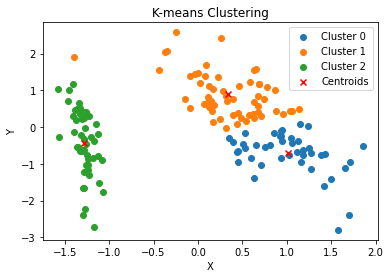

In [20]:
def print_clusters(clusters, centroids):
    """
    Plot the data points according to their clusters.
    The data points within the same clusters should have the same color. 
    Otherwise they should have different colors.
    Don't forget to mark the cluster centroids
    
    :params: clusters
    :params: centroids
    """
    # Colors array
    colors = ['blue', 'green', 'gray', 'yellow', 'black','brown','purple','orange','pink']
    # For each cluster
    for cluster_index in clusters:
        # For each point in cluster
        for point_index in clusters[cluster_index]:
            # Plot point with the color of its cluster
            plt.scatter(*point_index, color=colors[cluster_index])
    # Plot centroids with black
    for centroid in centroids:
        plt.scatter(*centroid, color='red', marker='x')
    plt.show()


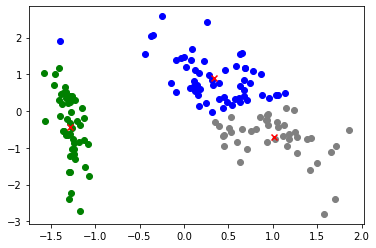

In [21]:
print_clusters(clusters_3, centroids_3)

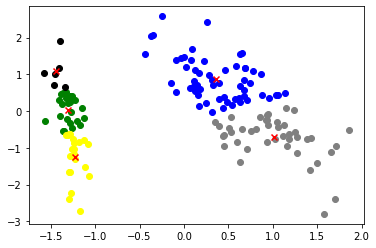

In [22]:
print_clusters(clusters_5, centroids_5)

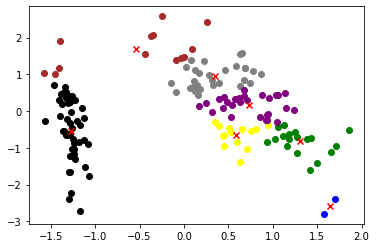

In [23]:
print_clusters(clusters_7, centroids_7)

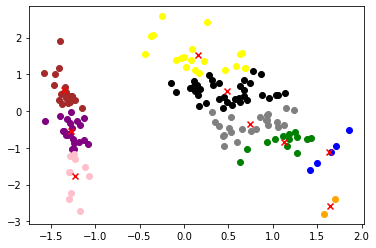

In [24]:
print_clusters(clusters_9, centroids_9)

## WCSS
* Obtain Within-Cluster Sum of Squares (WCSS) with different *k* values.
* **TODO**: Plot the results.
* **TODO**: Explain why WCSS can be used. What does the result mean to us? How can we decide the best *k* value. Interpret the plot. Write your comments.

In [25]:
wcss_values = []
# Define k values
k_values = range(1, 30)
# find wcss for each k value, and append them to the list
for k in k_values:
    kmeans = KMeans(X, k)
    _, _, wcss = kmeans.fit()
    wcss_values.append(wcss)

Converged in 1 steps
Converged in 13 steps
Converged in 10 steps
Converged in 7 steps
Converged in 10 steps
Converged in 9 steps
Converged in 13 steps
Converged in 5 steps
Converged in 8 steps
Converged in 10 steps
Converged in 9 steps
Converged in 9 steps
Converged in 8 steps
Converged in 9 steps
Converged in 5 steps
Converged in 5 steps
Converged in 6 steps
Converged in 11 steps
Converged in 6 steps
Converged in 8 steps
Converged in 12 steps
Converged in 8 steps
Converged in 7 steps
Converged in 7 steps
Converged in 6 steps
Converged in 7 steps
Converged in 7 steps
Converged in 15 steps
Converged in 10 steps


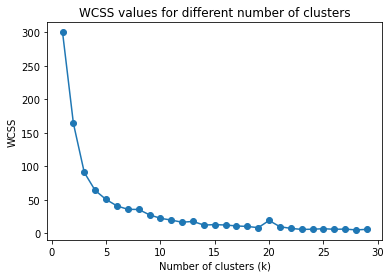

In [26]:
# Plotting the results
plt.plot(k_values, wcss_values, 'o-')
plt.title('WCSS values for different number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

TODO.Your comments HERE.

WCSS is the sum of the squared distance between each member of a cluster and its centroid. To decide the best k value, there is a technique called "Elbow Method". In the elbow method, we define a range for k values, and then run k-means clustering algorithm for these k values. For each k value, we calculate WCSS and then plot these values on a graph. The point where the curve bends significantly is considered as the best(optimal) k value. After this point, adding more clusters doesn't significantly improve the compactness of the solution. <br>

When I interpret the plot, I see that the WCSS drops significantly up to around k=4 or k=5.After this point, the decrease in WCSS is much slower,indicating that additional clusters are not providing as much distinct information. Therefore, according to the Elbow Method, k=4 or k=5 might be the optimal number of clusters for this data.